In [27]:
from scipy import stats

In [28]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-25')

In [30]:
spy_etf = web.DataReader('SPY', 'yahoo', start, end)

In [31]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,92.246048
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,92.490204
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,92.555328
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,92.946060
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,93.255348


In [32]:
aapl = web.DataReader('AAPL', 'yahoo', start, end)

In [33]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753


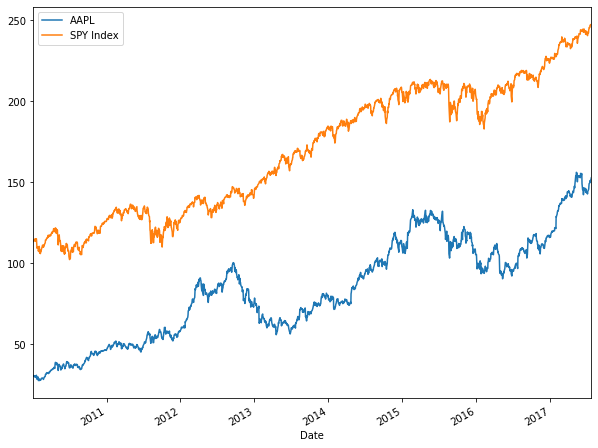

In [34]:
aapl['Close'].plot(label='AAPL', figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

In [35]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

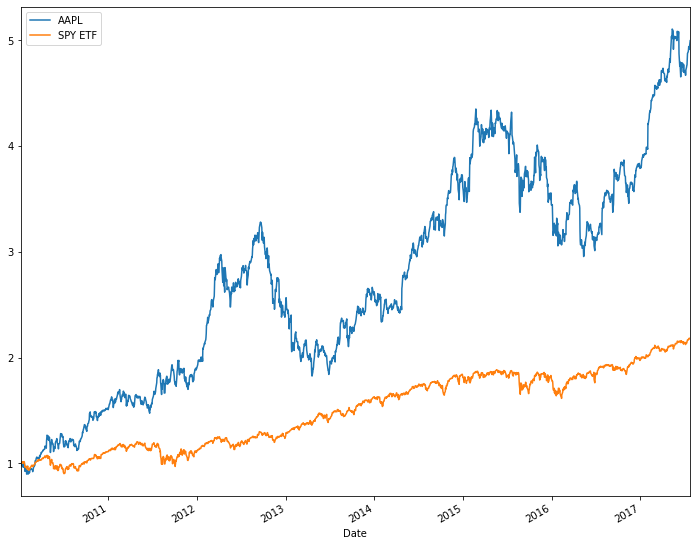

In [36]:
aapl['Cumulative'].plot(label='AAPL', figsize=(12,10))
spy_etf['Cumulative'].plot(label='SPY ETF')
plt.legend()

In [37]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

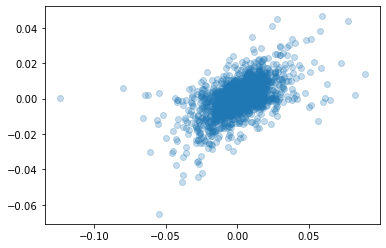

In [38]:
plt.scatter(aapl['Daily Return'], spy_etf['Daily Return'], alpha=0.25)

In [39]:
beta, alpha, r_value, p_value, std_err = stats.linregress(aapl['Daily Return'].iloc[1:],
                                                         spy_etf['Daily Return'].iloc[1:])

In [40]:
beta

0.3256447440862882

In [41]:
alpha

0.00013744006577028154

In [42]:
r_value

0.5555914696345488